In [133]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [134]:
def generate(a0, rc, l, b, h):
    #defining the basis points for FCC lattice
    b1 = [0,0,0]
    b2 = [a0,0,0]
    b3 = [a0,a0,0]
    b4 = [0,a0,0]
    b5 = [0,0,a0]
    b6 = [a0,0,a0]
    b7 = [a0,a0,a0]
    b8 = [0,a0,a0]

    f1 = [a0/2, a0, a0/2]
    f2 = [a0, a0/2, a0/2]
    f3 = [a0/2, 0, a0/2]
    f4 = [0,a0/2,a0/2]
    f5 = [a0/2, a0/2, 0]
    f6 = [a0/2, a0/2, a0]

    positions = []
    positions.append(b1)
    positions.append(b2)
    positions.append(b3)
    positions.append(b4)
    positions.append(b5)
    positions.append(b6)
    positions.append(b7)
    positions.append(b8)

    positions.append(f1)
    positions.append(f2)
    positions.append(f3)
    positions.append(f4)
    positions.append(f5)
    positions.append(f6)

    #Defining atomic positoins for entire fcc lattice
    #3 loops for repititive lattice translations along the x, y and z axis
    for i in range(l):
      for j in range(b):
        for k in range(h):
          if i==0 and j==0 and k==0:
            continue
          nb1 = [0+a0*i,0+a0*j,0+a0*k]
          nb2 = [a0+a0*i,0+a0*j,0+a0*k]
          nb3 = [a0+a0*i,a0+a0*j,0+a0*k]
          nb4 = [0+a0*i,a0+a0*j,0+a0*k]
          nb5 = [0+a0*i,0+a0*j,a0+a0*k]
          nb6 = [a0+a0*i,0+a0*j,a0+a0*k]
          nb7 = [a0+a0*i,a0+a0*j,a0+a0*k]
          nb8 = [0+a0*i,a0+a0*j,a0+a0*k]

          nf1 = [a0/2+a0*i, a0+a0*j, a0/2+a0*k]
          nf2 = [a0+a0*i, a0/2+a0*j, a0/2+a0*k]
          nf3 = [a0/2+a0*i, 0+a0*j, a0/2+a0*k]
          nf4 = [0+a0*i,a0/2+a0*j,a0/2+a0*k]
          nf5 = [a0/2+a0*i, a0/2+a0*j, 0+a0*k]
          nf6 = [a0/2+a0*i, a0/2+a0*j, a0+a0*k]

          positions.append(nb1)
          positions.append(nb2)
          positions.append(nb3)
          positions.append(nb4)
          positions.append(nb5)
          positions.append(nb6)
          positions.append(nb7)
          positions.append(nb8)

          positions.append(nf1)
          positions.append(nf2)
          positions.append(nf3)
          positions.append(nf4)
          positions.append(nf5)
          positions.append(nf6)
        
    positions = np.array(positions)

    #removing duplicate positions
    positions = np.unique(positions, axis=0)

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    central = np.array([l*a0/2,b*a0/2,h*a0/2])
    ax.scatter(central[0], central[1], central[2], s=50, c='red') #Plot central atom

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=3)

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = rc * np.outer(np.cos(u), np.sin(v)) + central[0]
    y = rc * np.outer(np.sin(u), np.sin(v)) + central[1]
    z = rc * np.outer(np.ones(np.size(u)), np.cos(v)) + central[2]

    ax.plot_wireframe(x, y, z, color='green', linewidth=0.5)



    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

    return positions 



In [135]:
def calculate(positions):
    
    central = np.array([l*a0/2,b*a0/2,h*a0/2]) #calculate position of central atom
    
    distances = np.linalg.norm(positions - central, axis=1) #find distances of all atoms from central atom
    
    central_index = np.argmin(distances) #find the index if central atom

    distances = np.sort(distances)

    distances = np.unique(distances) #removing duplicate values 

    distances  = distances[distances!=0] #removing distances with value zero

    distances = distances[distances<=rc] #include only distances having value less than the cutoff radius 

    lj = []

    for r in distances:
        u = lennard_jones_potential(r)
        lj.append(u)

    lj = np.array(lj)

    return lj, distances

In [136]:
def lennard_jones_potential(r):
    
    #initializing constants
    epsilon = 1
    sigma = 1
    A6 = 14.4539
    A12 = 12.1318

    u = 2*epsilon*(math.pow((sigma/r),12)*A12 - math.pow((sigma/r),6)*A6)
    return u

In [137]:
def plot(lj, distances):
    import math
    plt.figure(figsize=(10,6))  
    plt.plot(distances, lj, marker='o', linestyle='-', markersize=4, color = 'red')  # Plot with markers and a line

    # Set limits to the data range
    plt.xlim(min(distances), max(distances))  
    plt.ylim(-10,10) 

    plt.xlabel("Distances", fontsize=12)
    plt.ylabel("Lennard-Jones Potential (LJ)", fontsize=12)
    plt.title("Lennard-Jones Potential vs. Distance", fontsize=14)

    plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y = 0
    plt.axvline(x=0, color='black', linestyle='--')  # Add vertical line at x = 0


    plt.grid(True) 
    plt.show()

In [138]:
def find_values(lj, distances):
    lowest_energy = np.min(lj)
    index = np.argmin(lj)
    equilibrium_lattice_parameter = distances[index]

    return lowest_energy, equilibrium_lattice_parameter



In [139]:
def special_plot(lj, distances):
    import math
    plt.figure(figsize=(10,6))  
    plt.plot(distances, lj, marker='o', linestyle='-', markersize=4, color = 'red')  # Plot with markers and a line

    # Set limits to the data range
    plt.xlim(min(distances), max(distances))  
    plt.ylim(-0.1*1.19684901e+13,0.1*1.19684901e+13) 

    plt.xlabel("Distances", fontsize=12)
    plt.ylabel("Lennard-Jones Potential (LJ)", fontsize=12)
    plt.title("Lennard-Jones Potential vs. Distance", fontsize=14)

    plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y = 0
    plt.axvline(x=0, color='black', linestyle='--')  # Add vertical line at x = 0


    plt.grid(True) 
    plt.show()

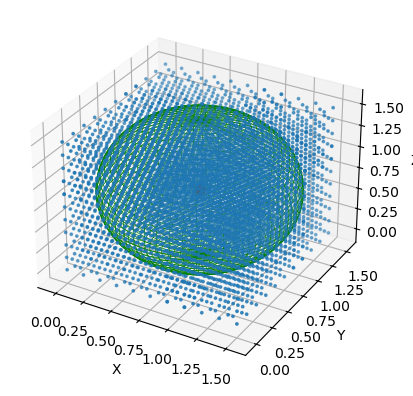

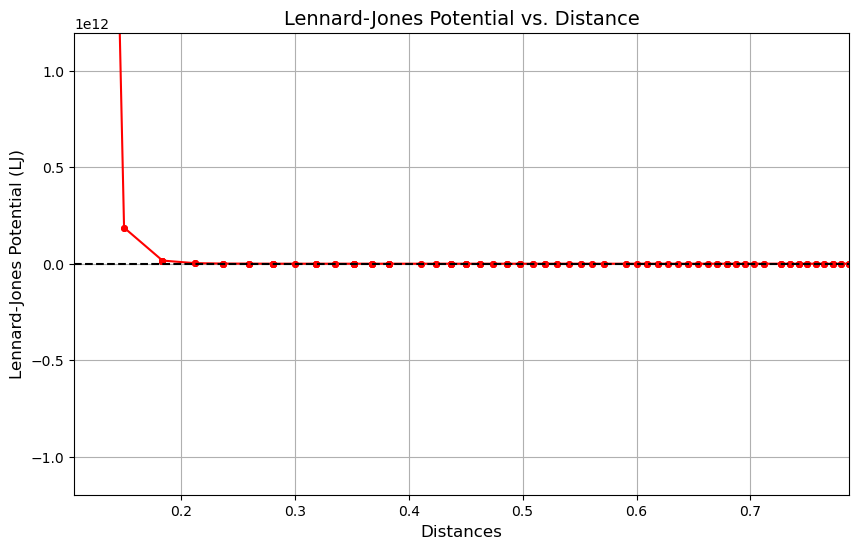

lowest energy = 310.3475909600502
eqm lattice parameter = 0.7866066361276137


In [140]:
a0 = 0.15
rc = 0.8
positions = generate(a0, rc, l, b, h)
lj, distances = calculate(positions)
special_plot(lj, distances)

lowest_energy, eqm_lattice_parameter = find_values(lj, distances)
print(f'lowest energy = {lowest_energy}')
print(f'eqm lattice parameter = {eqm_lattice_parameter}')


In [141]:
#When lattice parameter is very small as in this case, the repuslsiive forces dominate greatly over the attractive forces, so the lennard jones potential is highly positive in this case.
#When a simulation cell is used, the effect of repuslion is further increased as an even smaller volume is observed  
#To demonstrate the highly positive inital value of lennard jones potential obtained as a result of using a simulationn cell, the above graph is plotted using a very large scale.
# in the subsequent calculation, for this case, all the atoms in the solid have been included in the simulation, to counter this high force of repulsion.

Lattice Parameter = 0.15
Cutoff Radius = 1.3



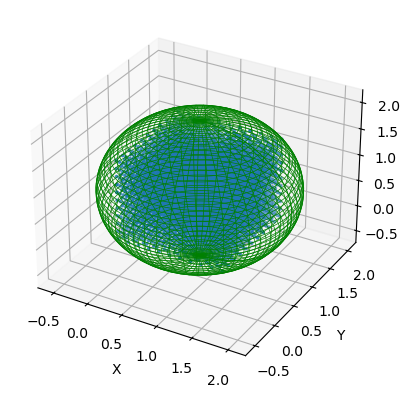

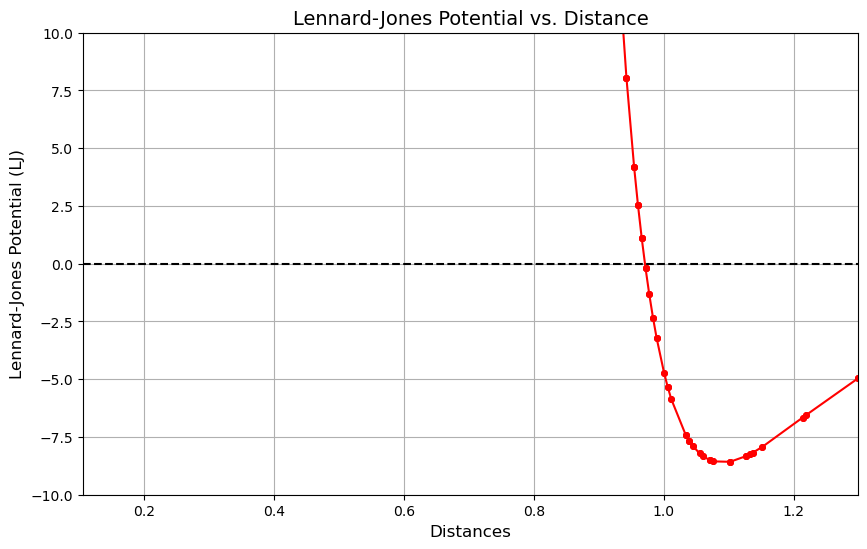

lowest energy = -8.574882522794605
eqm separation = 1.1022703842524297
eqm lattice constant = 3.117220646665871
----------------------------------------------
Lattice Parameter = 0.2
Cutoff Radius = 1.2



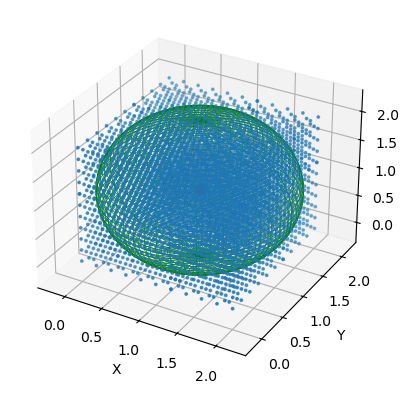

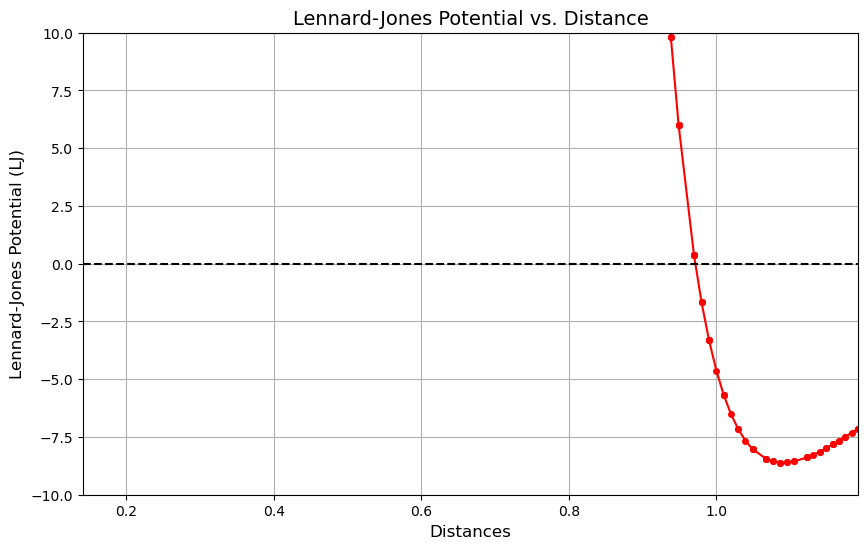

lowest energy = -8.606176847230468
eqm separation = 1.0862780491200217
eqm lattice constant = 3.0719943229114213
----------------------------------------------
Lattice Parameter = 0.25
Cutoff Radius = 1.3



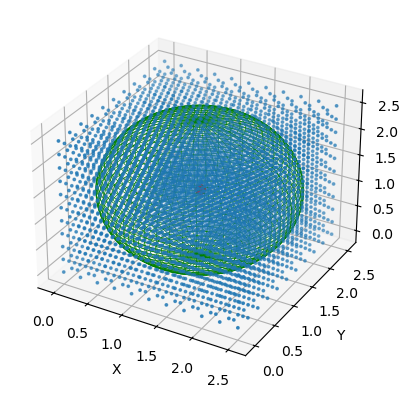

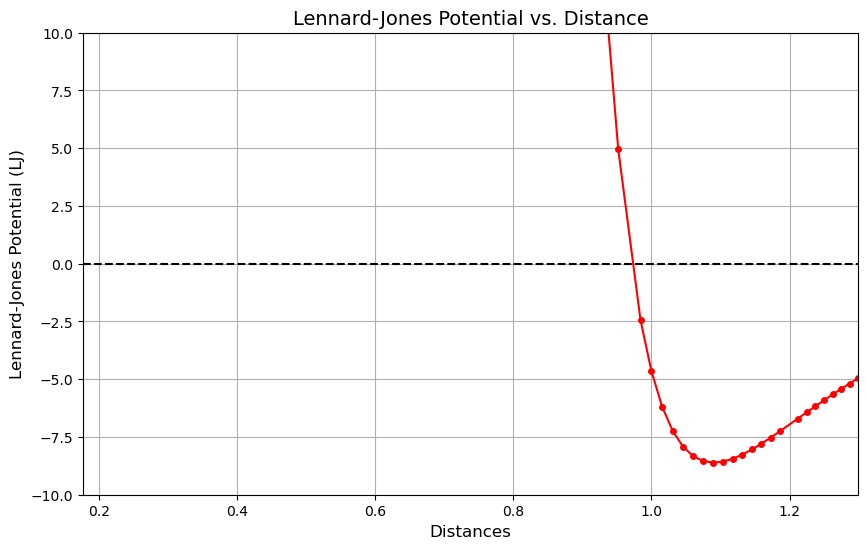

lowest energy = -8.610179672936725
eqm separation = 1.0897247358851685
eqm lattice constant = 3.081741553083256
----------------------------------------------
Lattice Parameter = 0.3
Cutoff Radius = 1.5



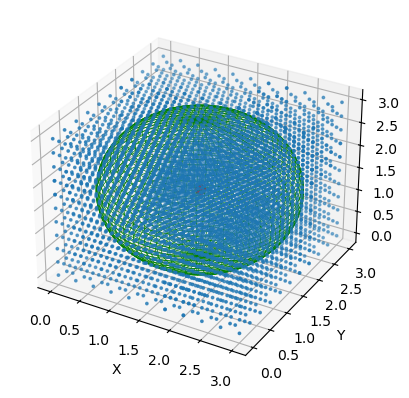

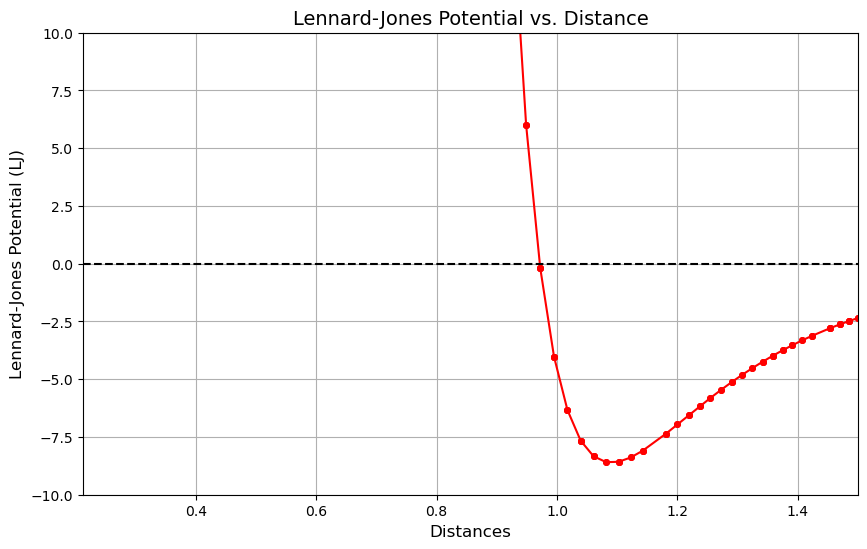

lowest energy = -8.590291516700482
eqm separation = 1.0816653826391966
eqm lattice constant = 3.058949702103648
----------------------------------------------
Lattice Parameter = 0.35
Cutoff Radius = 1.6



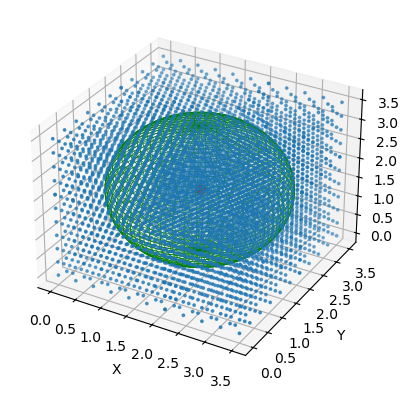

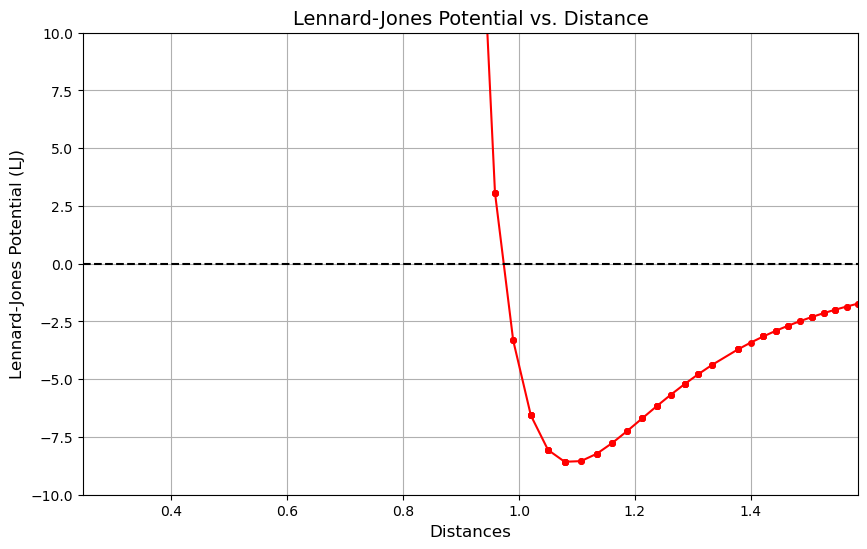

lowest energy = -8.573739758519464
eqm separation = 1.0787724505195708
eqm lattice constant = 3.050768490069346
----------------------------------------------
Lattice Parameter = 0.4
Cutoff Radius = 2.0



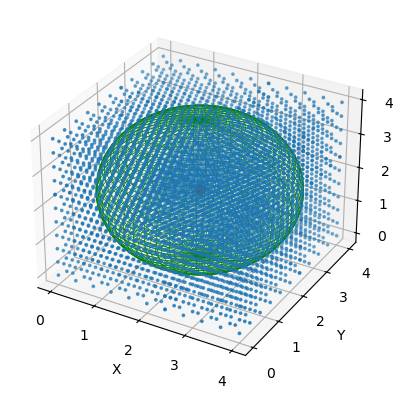

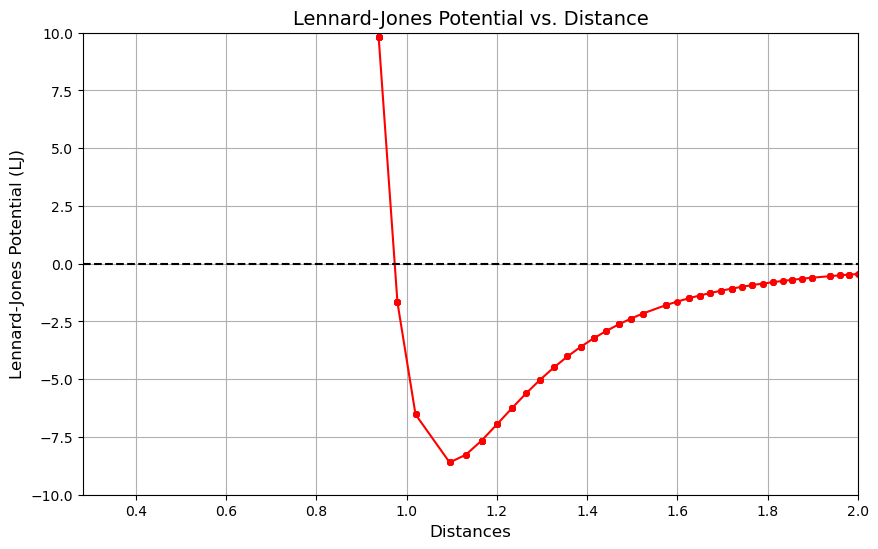

lowest energy = -8.603220378943762
eqm separation = 1.0954451150103324
eqm lattice constant = 3.09791878524922
----------------------------------------------
Lattice Parameter = 0.45
Cutoff Radius = 2.2



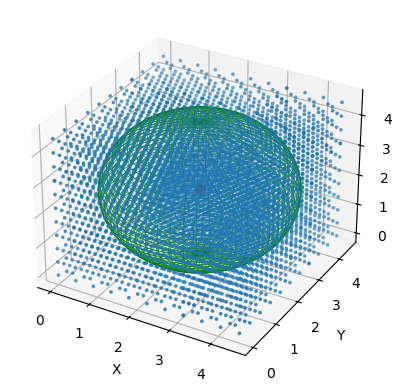

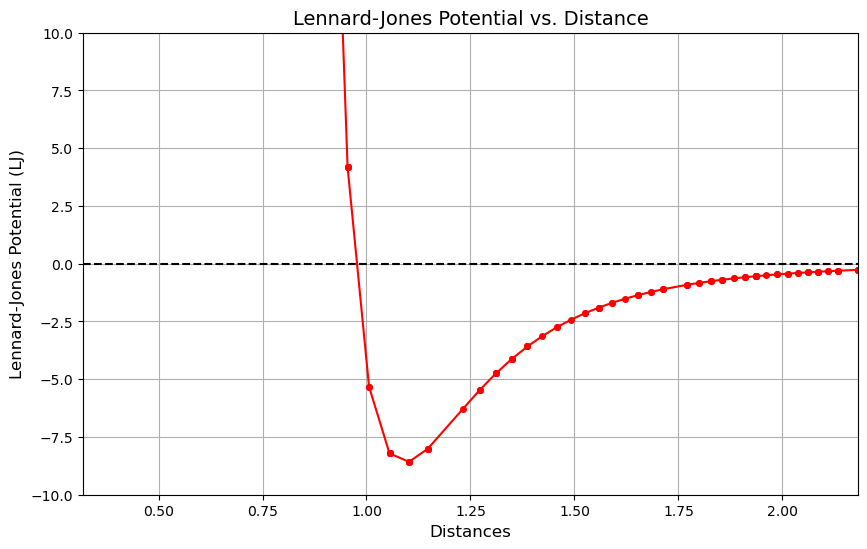

lowest energy = -8.574882522794601
eqm separation = 1.10227038425243
eqm lattice constant = 3.1172206466658716
----------------------------------------------
Lattice Parameter = 0.5
Cutoff Radius = 2.3



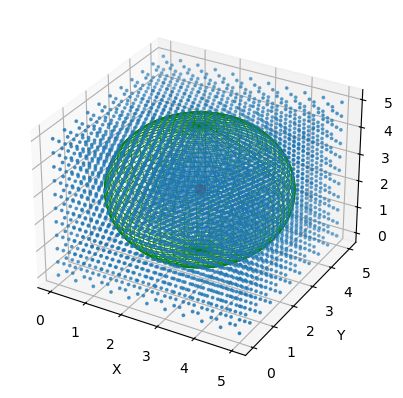

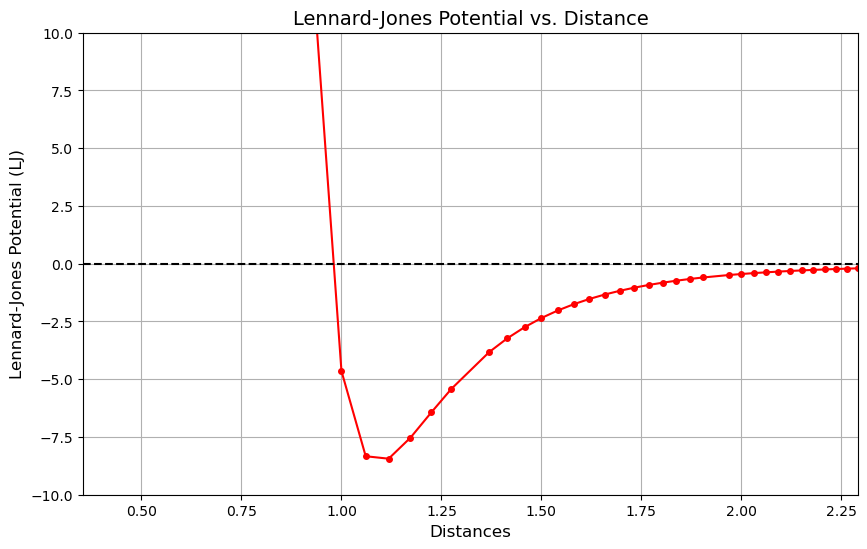

lowest energy = -8.4402364416
eqm separation = 1.118033988749895
eqm lattice constant = 3.1618001201847026
----------------------------------------------
Lattice Parameter = 0.6
Cutoff Radius = 2.6



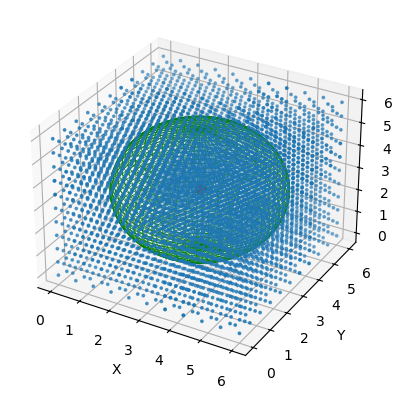

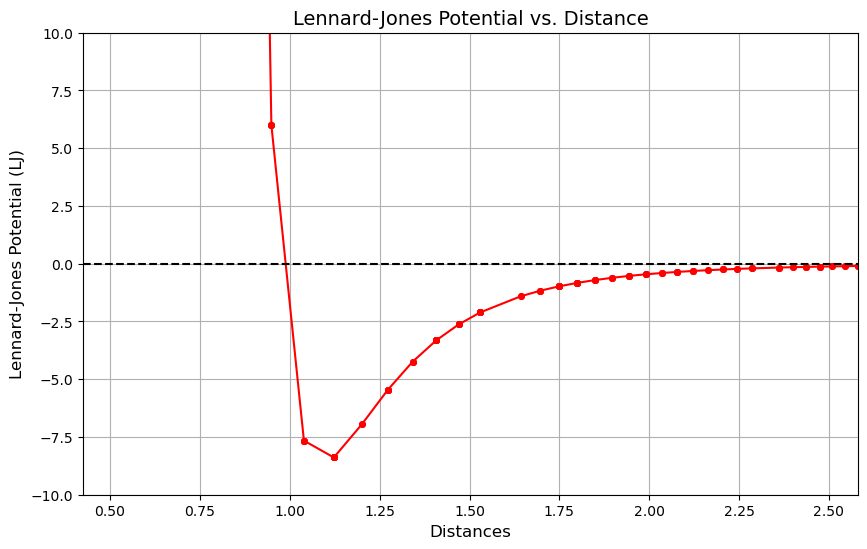

lowest energy = -8.387563312944303
eqm separation = 1.1224972160321818
eqm lattice constant = 3.17442212693901
----------------------------------------------
Lattice Parameter = 0.8
Cutoff Radius = 2.8



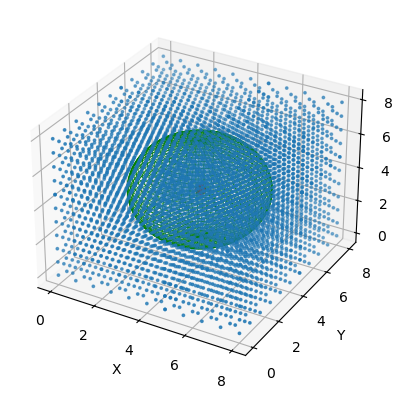

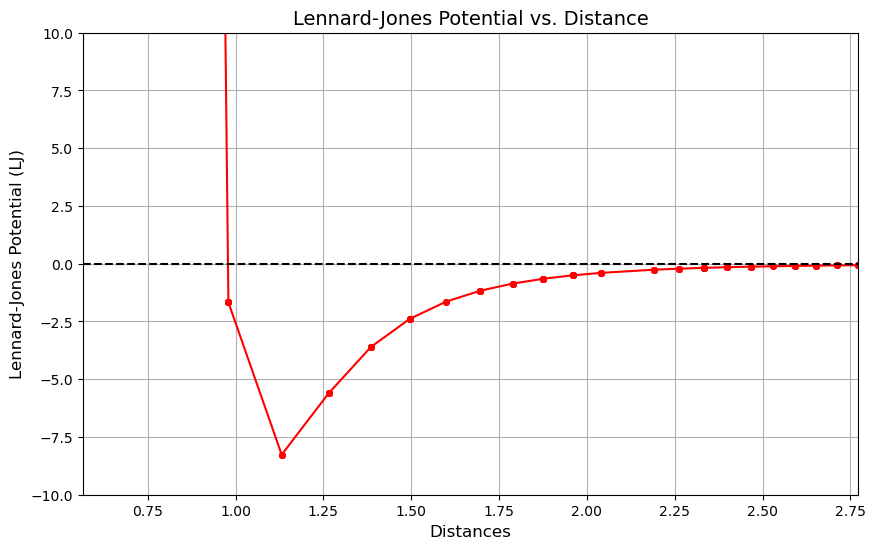

lowest energy = -8.267409290419895
eqm separation = 1.1313708498984758
eqm lattice constant = 3.1995167635128894
----------------------------------------------
Lattice Parameter = 0.9
Cutoff Radius = 2.9



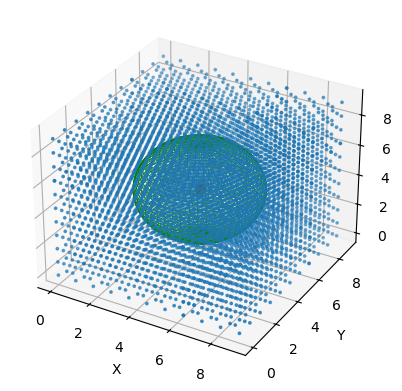

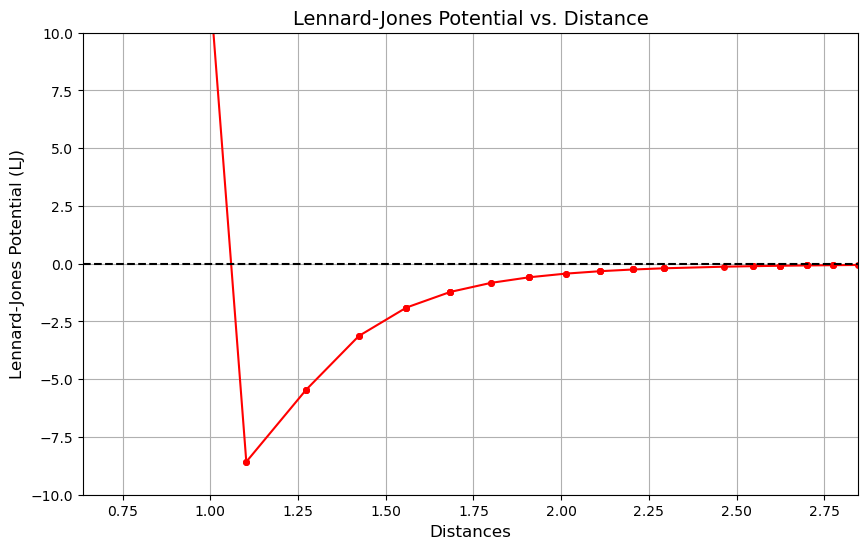

lowest energy = -8.574882522794601
eqm separation = 1.1022703842524302
eqm lattice constant = 3.1172206466658725
----------------------------------------------
Lattice Parameter = 1.0
Cutoff Radius = 3.0



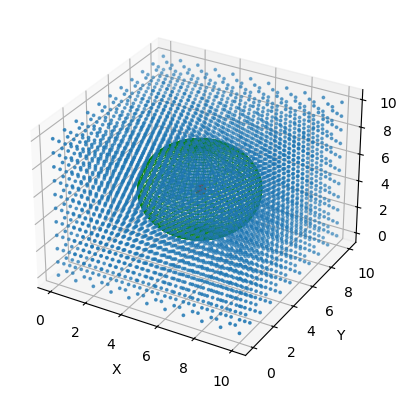

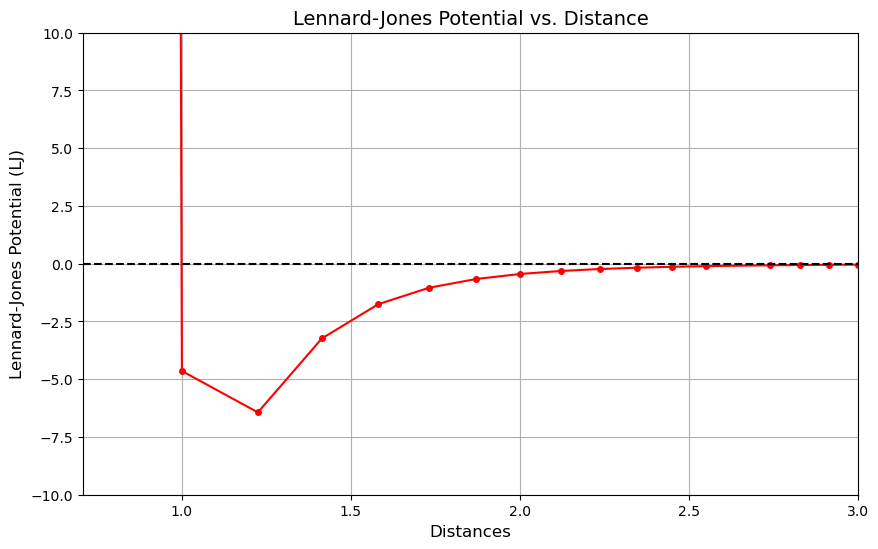

lowest energy = -6.435136351165985
eqm separation = 1.224744871391589
eqm lattice constant = 3.4635784962954133
----------------------------------------------
Lattice Parameter = 1.1
Cutoff Radius = 4.0



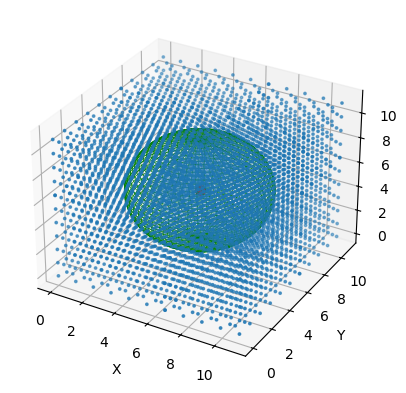

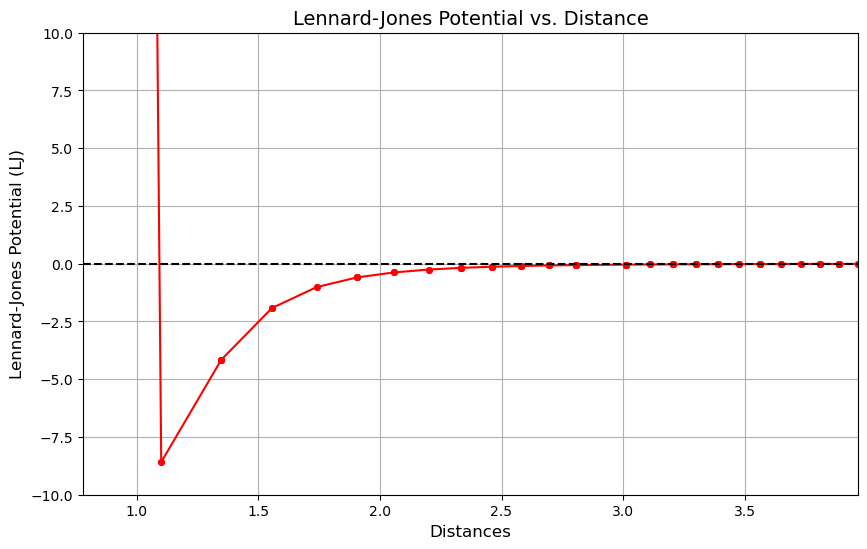

lowest energy = -8.586568766611574
eqm separation = 1.0999999999999996
eqm lattice constant = 3.110799999999999
----------------------------------------------
Lattice Parameter = 1.2
Cutoff Radius = 4.2



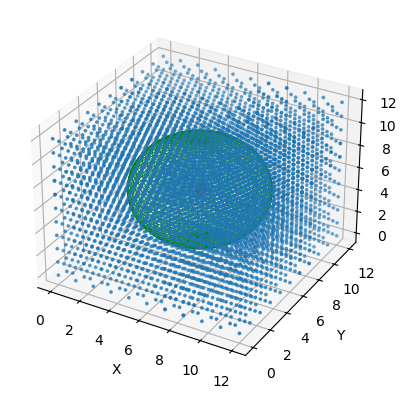

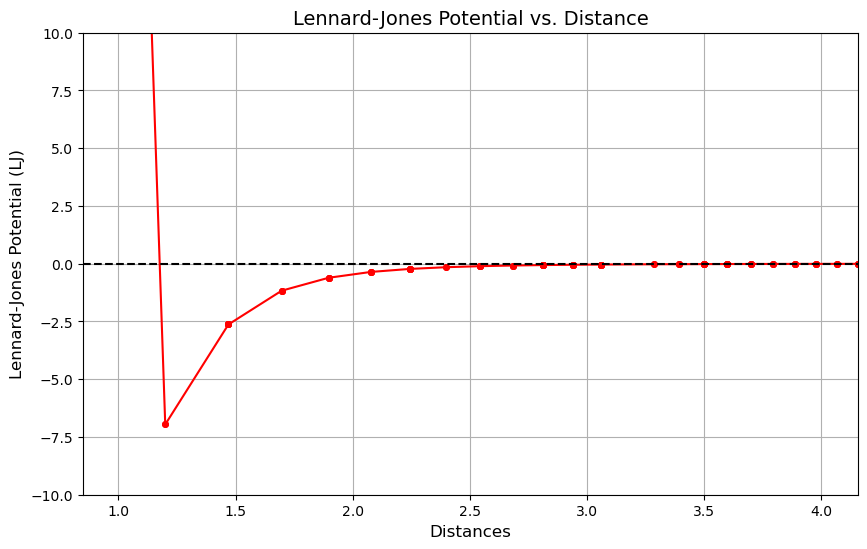

lowest energy = -6.959839521249236
eqm separation = 1.1999999999999993
eqm lattice constant = 3.393599999999998
----------------------------------------------
Lattice Parameter = 1.3
Cutoff Radius = 4.3



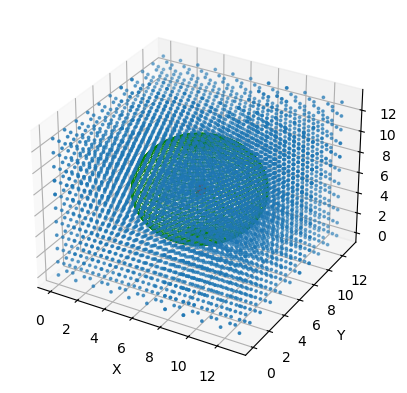

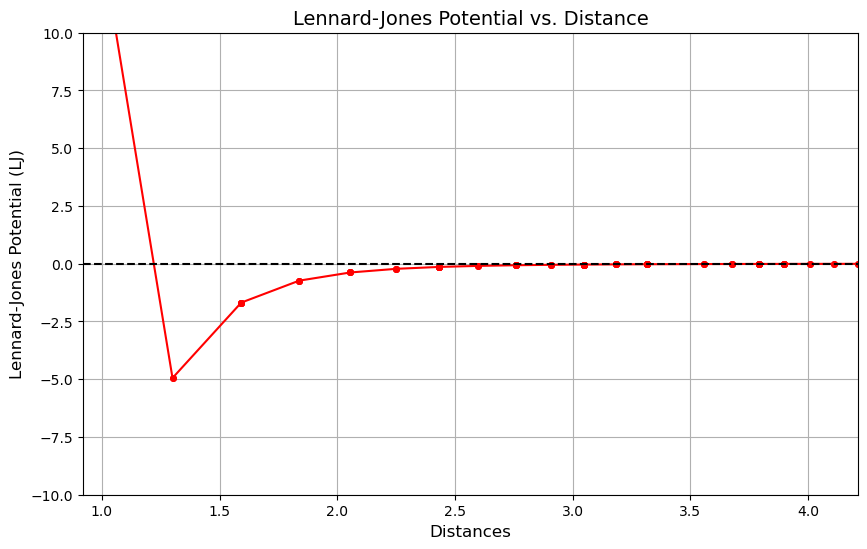

lowest energy = -4.94756666070268
eqm separation = 1.2999999999999998
eqm lattice constant = 3.6763999999999992
----------------------------------------------
Lattice Parameter = 1.35
Cutoff Radius = 6



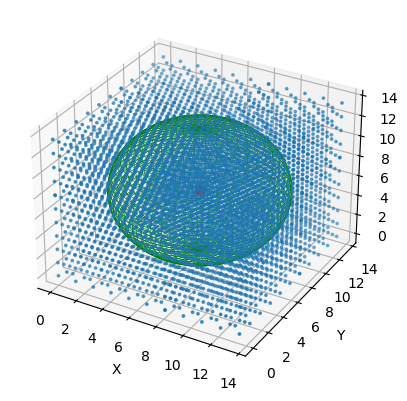

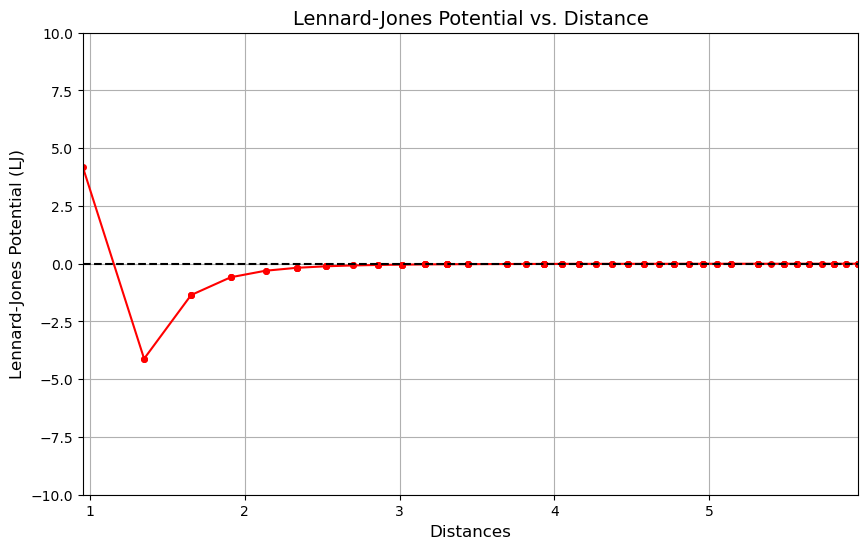

lowest energy = -4.113289125496499
eqm separation = 1.3499999999999996
eqm lattice constant = 3.8177999999999988
----------------------------------------------
Lattice Parameter = 1.373
Cutoff Radius = 8



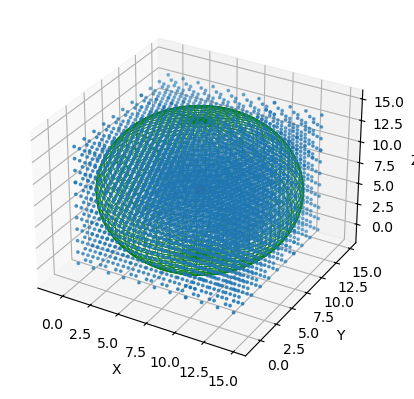

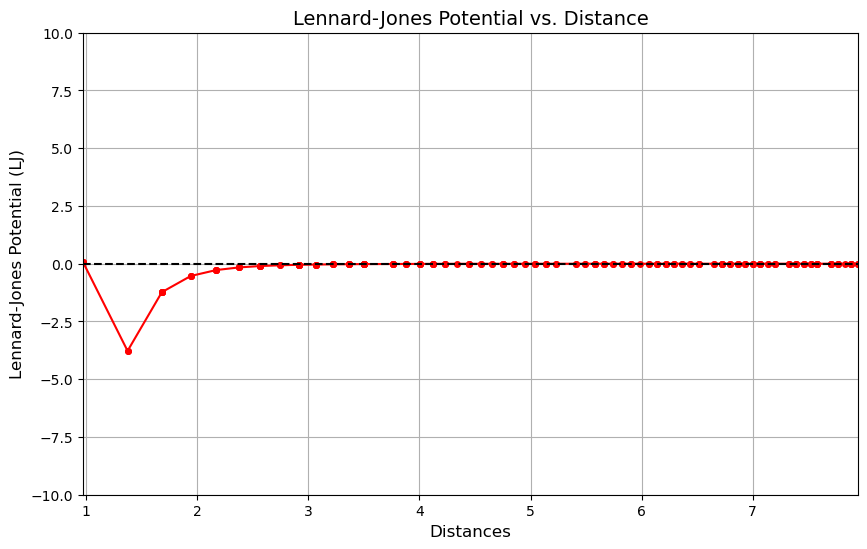

lowest energy = -3.774468703968961
eqm separation = 1.3729999999999993
eqm lattice constant = 3.8828439999999977
----------------------------------------------
Lattice Parameter = 1.5
Cutoff Radius = 8



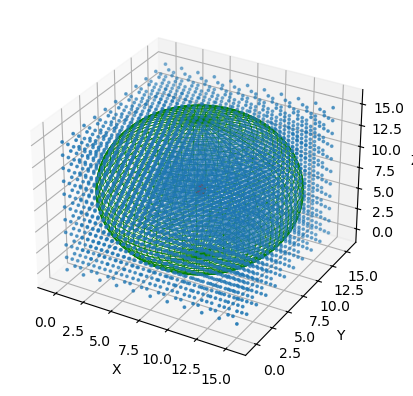

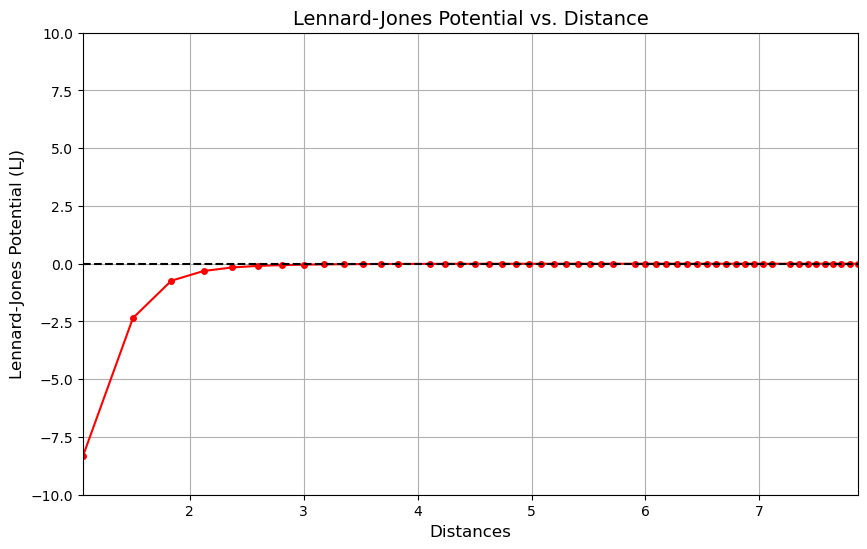

lowest energy = -8.334361436170713
eqm separation = 1.0606601717798212
eqm lattice constant = 2.9995469657933342
----------------------------------------------
Lattice Parameter = 2.0
Cutoff Radius = 8



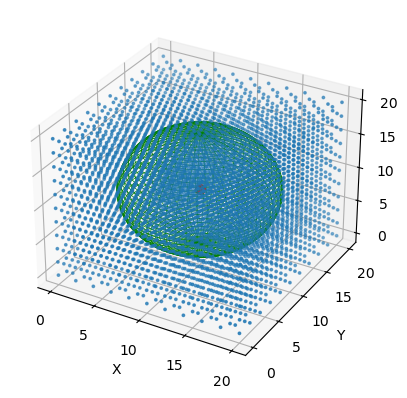

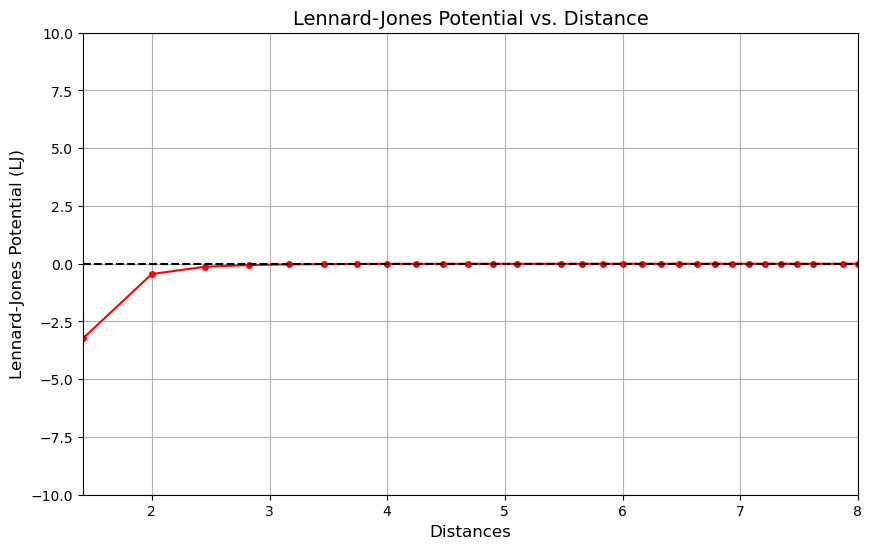

lowest energy = -3.2343562499999985
eqm separation = 1.4142135623730951
eqm lattice constant = 3.999395954391113
----------------------------------------------
Lattice Parameter = 3.0
Cutoff Radius = 10



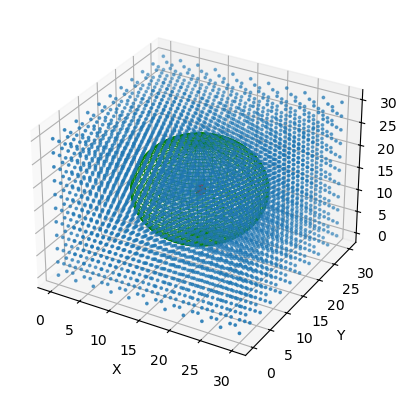

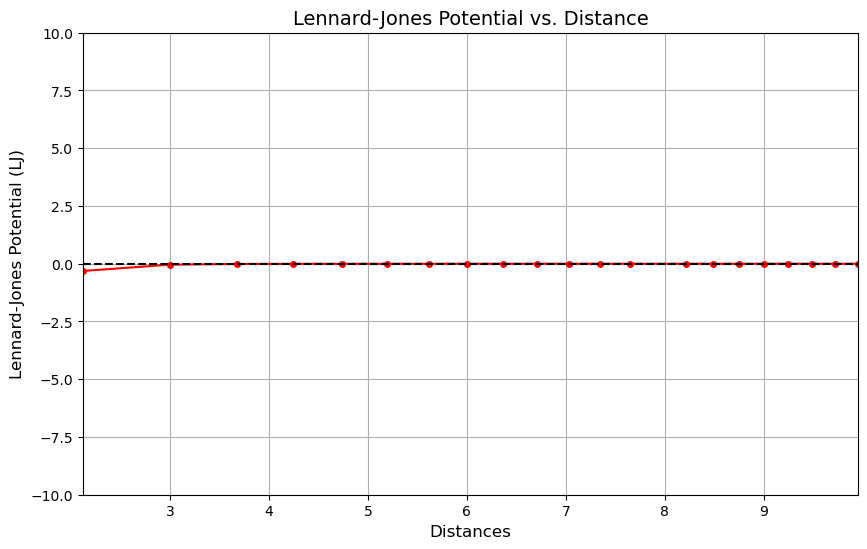

lowest energy = -0.31431037349395347
eqm separation = 2.1213203435596424
eqm lattice constant = 5.9990939315866685
----------------------------------------------
Lattice Parameter = 4.0
Cutoff Radius = 15



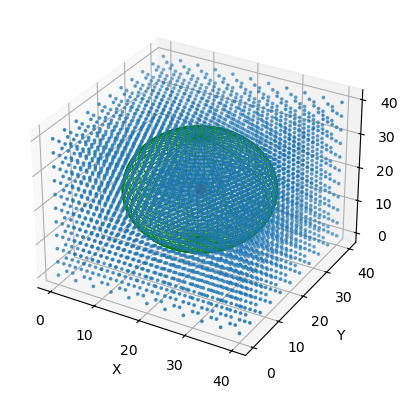

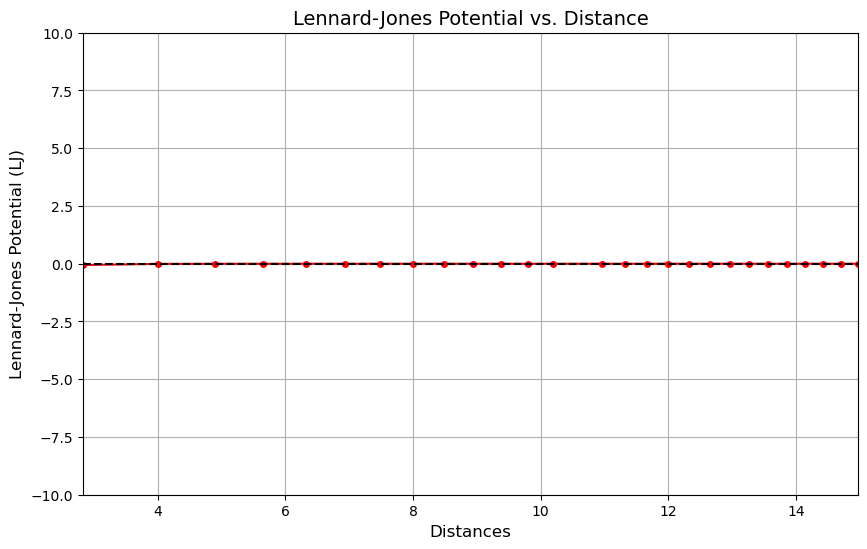

lowest energy = -0.05636798858642575
eqm separation = 2.8284271247461903
eqm lattice constant = 7.998791908782226
----------------------------------------------


In [158]:
dataset = [(0.15, 1.3),
           (0.20, 1.2),
           (0.25, 1.3),
           (0.3, 1.5),
           (0.35, 1.6),
           (0.40, 2.0),
           (0.45, 2.2),
           (0.50, 2.3),
           (0.60, 2.6),
           (0.80, 2.8),
           (0.90, 2.9),
           (1.00, 3.0),
           (1.1, 4.0),
           (1.2, 4.2),
           (1.3, 4.3),
           (1.35, 6),
           (1.373, 8),
           (1.50, 8),
           (2.00, 8),
           (3.00, 10),
           (4.00, 15)]
le = []
eql = []
a=[]
max_lj = []
for data in dataset:
    a0 = data[0]
    rc = data[1]
    print(f'Lattice Parameter = {a0}')
    print(f'Cutoff Radius = {rc}')
    print()
    positions = generate(a0, rc, l, b, h)
    lj, distances = calculate(positions)
    plot(lj, distances)

    lowest_energy, eqm_separation = find_values(lj, distances)
    print(f'lowest energy = {lowest_energy}')
    print(f'eqm separation = {eqm_separation}')
    print(f'eqm lattice constant = {eqm_separation*2.828}')
    le.append(lowest_energy)
    eql.append(eqm_separation)
    a.append(a0)
    max_lj.append(lj[0])
    print('----------------------------------------------')

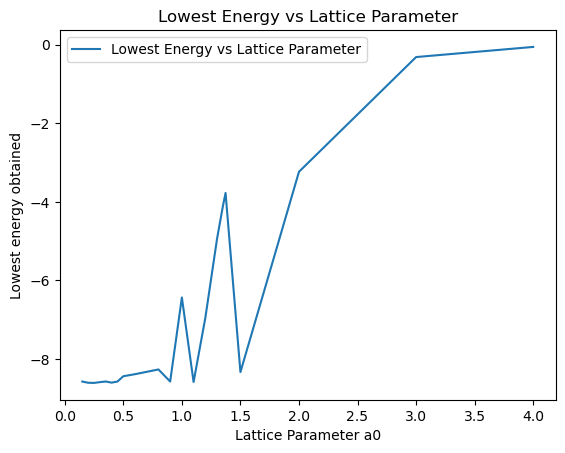

In [146]:
plt.plot(a, le, label='Lowest Energy vs Lattice Parameter')
plt.xlabel('Lattice Parameter a0')
plt.ylabel('Lowest energy obtained')
plt.title('Lowest Energy vs Lattice Parameter')
plt.legend()
plt.show()


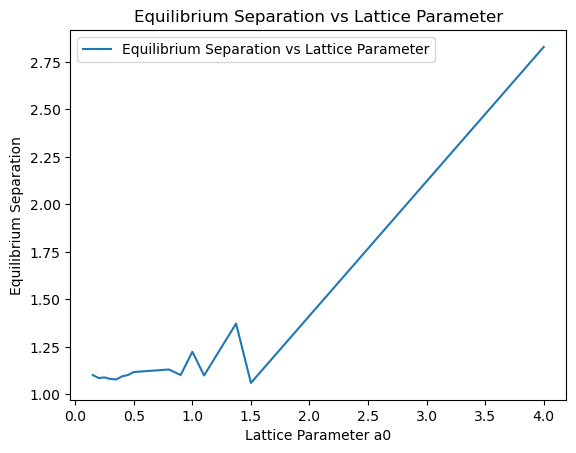

In [156]:
plt.plot(a, eql, label='Equilibrium Separation vs Lattice Parameter')
plt.xlabel('Lattice Parameter a0')
plt.ylabel('Equilibrium Separation')
plt.title('Equilibrium Separation vs Lattice Parameter')
plt.legend()
plt.show()


In [150]:
eql = np.array(eql)

In [151]:
eqa = eql*2.828
eqa

array([3.11722065, 3.07199432, 3.08174155, 3.0589497 , 3.05076849,
       3.09791879, 3.11722065, 3.16180012, 3.17442213, 3.19951676,
       3.11722065, 3.4635785 , 3.1108    , 3.3936    , 3.6764    ,
       3.8178    , 3.882844  , 2.99954697, 3.99939595, 5.99909393,
       7.99879191])

In [154]:
eqa = eqa.tolist()

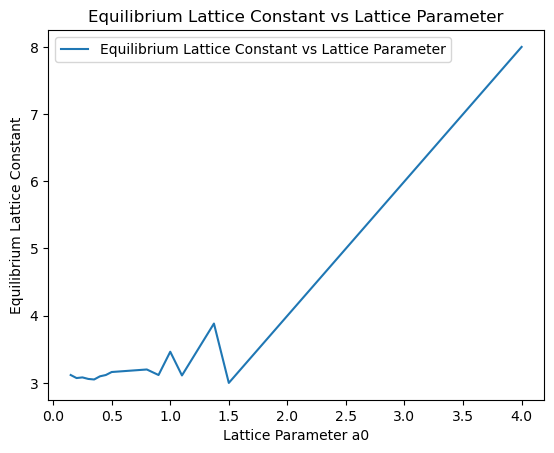

In [155]:
plt.plot(a, eqa, label='Equilibrium Lattice Constant vs Lattice Parameter')
plt.xlabel('Lattice Parameter a0')
plt.ylabel('Equilibrium Lattice Constant')
plt.title('Equilibrium Lattice Constant vs Lattice Parameter')
plt.legend()
plt.show()


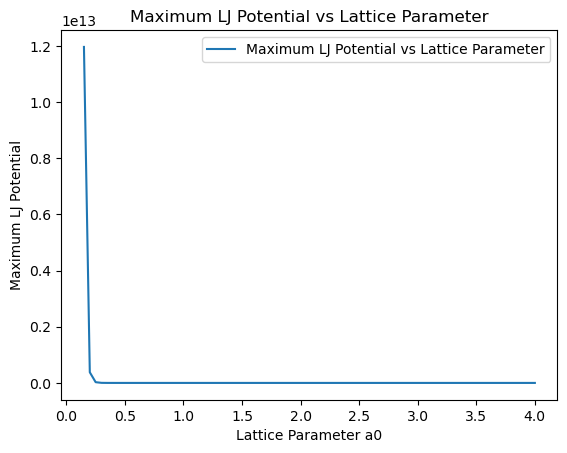

In [159]:
plt.plot(a, max_lj, label='Maximum LJ Potential vs Lattice Parameter')
plt.xlabel('Lattice Parameter a0')
plt.ylabel('Maximum LJ Potential')
plt.title('Maximum LJ Potential vs Lattice Parameter')
plt.legend()
plt.show()